In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_AW_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
1,5,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1
2,3,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1
3,6,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1
4,4,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1
679,2,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
680,5,10.0,10.0,10.0,4.0,10.0,5.0,6.0,3
681,1,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	9
float64		column 3	18
float64		column 4	3
float64		column 5	9
float64		column 6	6
float64		column 7	6
float64		column 8	3
int64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,683.000000,674.000000,665.000000,680.000000,674.000000,677.000000,677.000000,680.000000,683.000000
mean,4.442167,3.130564,3.183459,2.825000,3.218101,3.553914,3.451994,2.845588,1.603221
std,2.820761,3.053391,2.970644,2.855936,2.221380,3.644986,2.452414,3.035574,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,3.250000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

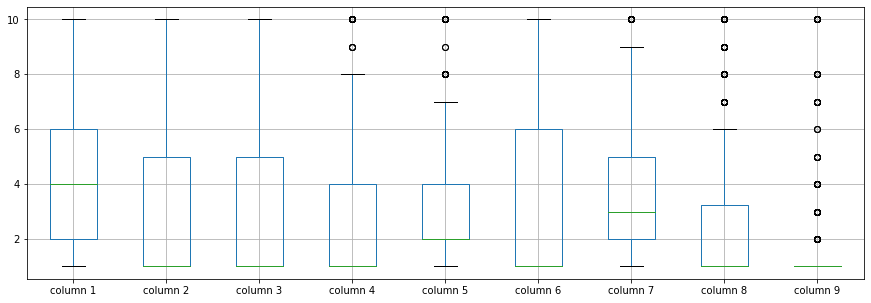

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.442167
column 2    3.130564
column 3    3.183459
column 4    2.825000
column 5    3.218101
column 6    3.553914
column 7    3.451994
column 8    2.845588
column 9    1.603221
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.646601,0.643990,0.484072,0.518229,0.594439,0.552018,0.538031,0.350957
column 2,0.646601,1.000000,0.907932,0.700297,0.746557,0.688981,0.752522,0.717975,0.458435
column 3,0.643990,0.907932,1.000000,0.674764,0.716289,0.718039,0.738292,0.712007,0.424657
column 4,0.484072,0.700297,0.674764,1.000000,0.584479,0.671560,0.669937,0.595669,0.409744
column 5,0.518229,0.746557,0.716289,0.584479,1.000000,0.586671,0.612747,0.624975,0.478087
column 6,0.594439,0.688981,0.718039,0.671560,0.586671,1.000000,0.676219,0.574969,0.351343
column 7,0.552018,0.752522,0.738292,0.669937,0.612747,0.676219,1.000000,0.662121,0.345943
column 8,0.538031,0.717975,0.712007,0.595669,0.624975,0.574969,0.662121,1.000000,0.431100
column 9,0.350957,0.458435,0.424657,0.409744,0.478087,0.351343,0.345943,0.431100,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+80,9+80+80,9+80+80,9+80+80+80+80,9+80+80+80,9+80+80,9+80,9], vae_layer = False, seed = 800)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 36.6511781783331
Epoch: 1 , loss: 36.46567862374442
Epoch: 2 , loss: 36.256193933032804
Epoch: 3 , loss: 36.11634263538179
Epoch: 4 , loss: 33.85881305876232
Epoch: 5 , loss: 31.624311083839054
Epoch: 6 , loss: 31.00683053334554
Epoch: 7 , loss: 30.503583453950426
Epoch: 8 , loss: 29.439177785600936
Epoch: 9 , loss: 28.770675159636
Epoch: 10 , loss: 28.750290234883625
Epoch: 11 , loss: 28.073439779735747
Epoch: 12 , loss: 26.903810183207195
Epoch: 13 , loss: 27.393090475173224
Epoch: 14 , loss: 27.101049650283088
Epoch: 15 , loss: 26.572774387541273
Epoch: 16 , loss: 26.195081597282773
Epoch: 17 , loss: 26.319775808425177
Epoch: 18 , loss: 25.622809410095215
Epoch: 19 , loss: 25.382657868521555
Epoch: 20 , loss: 24.979821114313033
Epoch: 21 , loss: 25.367410977681477
Epoch: 22 , loss: 25.03549289703369
Epoch: 23 , loss: 25.702020690554665
Epoch: 24 , loss: 25.738933290754044
Epoch: 25 , loss: 24.7317164

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
678,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
679,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
680,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
681,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(24.040100268909843, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.07169125785503311

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
1,5,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1
2,3,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1
3,6,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1
4,4,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...
678,3,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1
679,2,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1
680,5,10.0,10.0,10.0,4.0,10.0,5.0,6.0,3
681,1,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1


In [20]:
imputations[-1].to_excel("BCW_AW_1(imp).xlsx", index=False, header=False)